In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#EDA (Exploratory Data Analysis)

1. Data Cleaning and Preprocessing

In [4]:
from google.colab import files
uploaded= files.upload()

Saving solarpowergeneration.csv to solarpowergeneration (1).csv


In [6]:
# Load the dataset
df = pd.read_csv("solarpowergeneration.csv")

In [7]:
df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


In [9]:
df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [10]:
#Check for missing value
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [11]:
# Handle missing values
# Impute missing numerical values with the median
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-11-2de3463a11de>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [12]:
# Confirm no missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


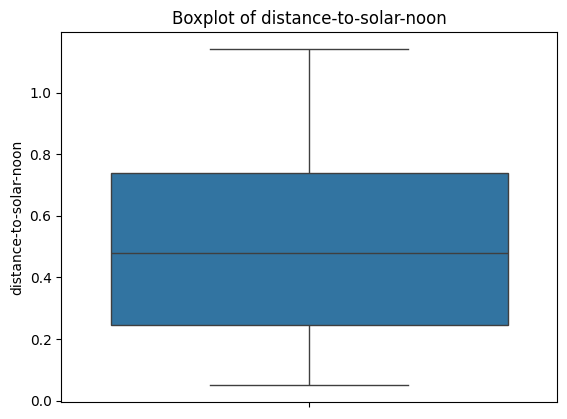

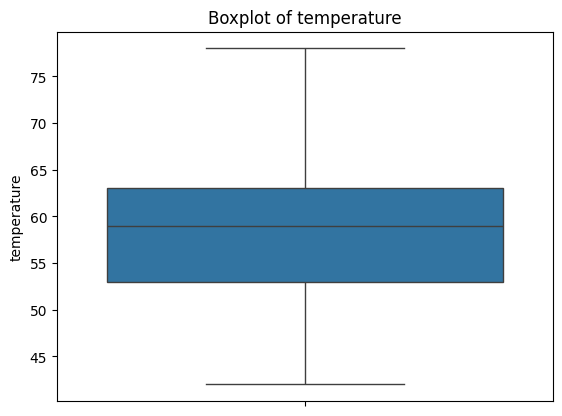

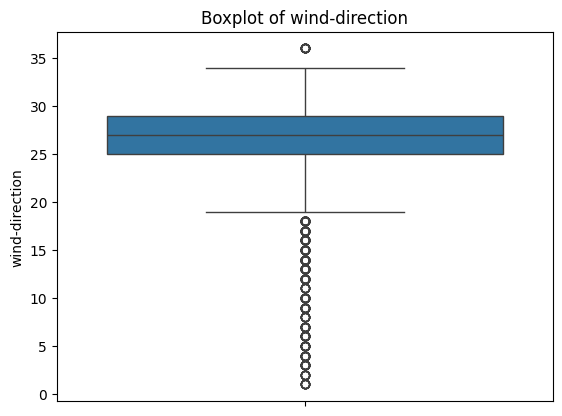

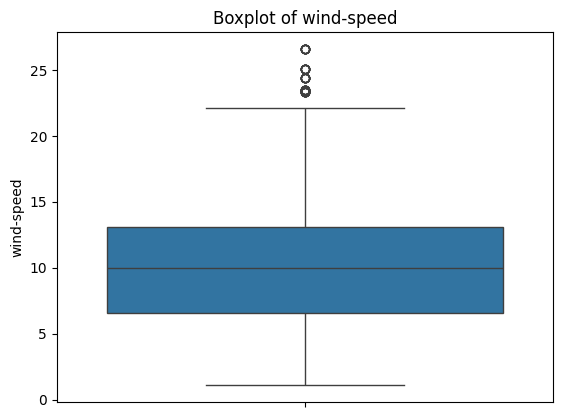

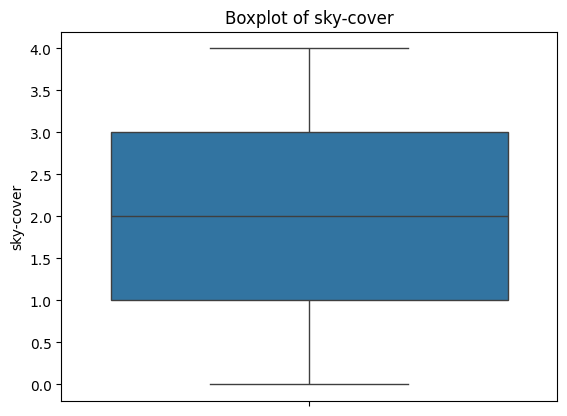

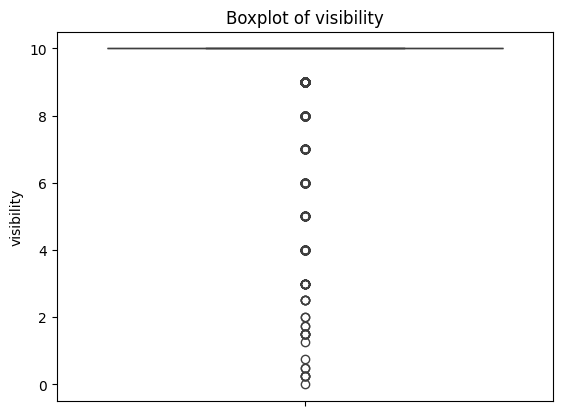

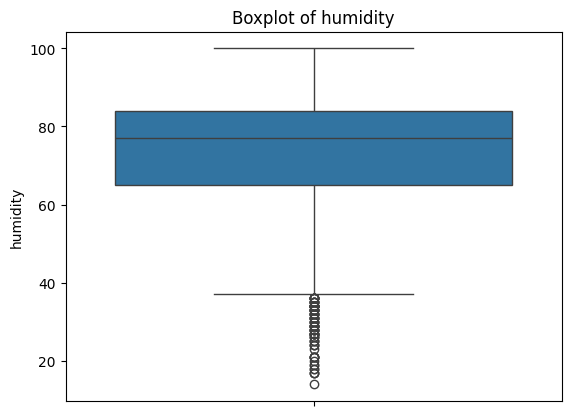

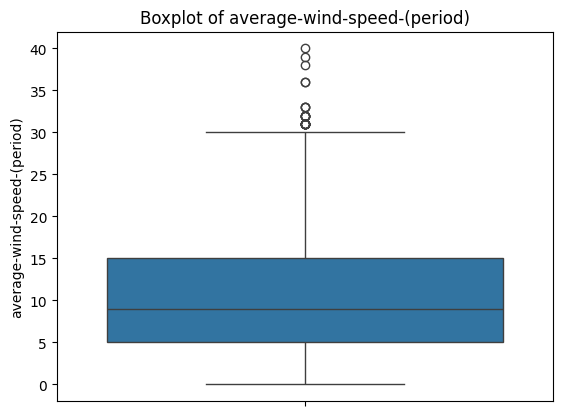

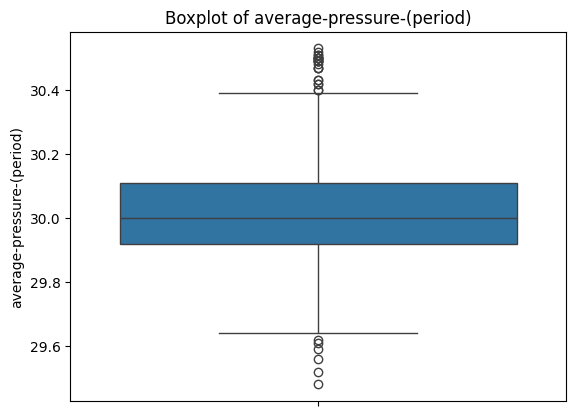

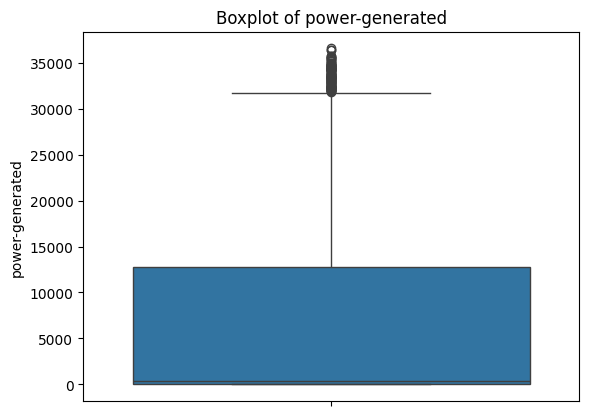

In [13]:
#Detect and treat outliers
# Visualize outliers using boxplots
for col in numerical_columns:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [14]:
# Treat outliers using the 5th and 95th percentile capping
for col in numerical_columns:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

2. Visualization

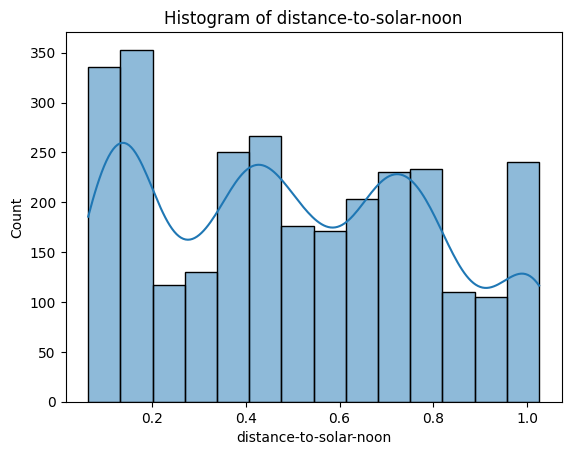

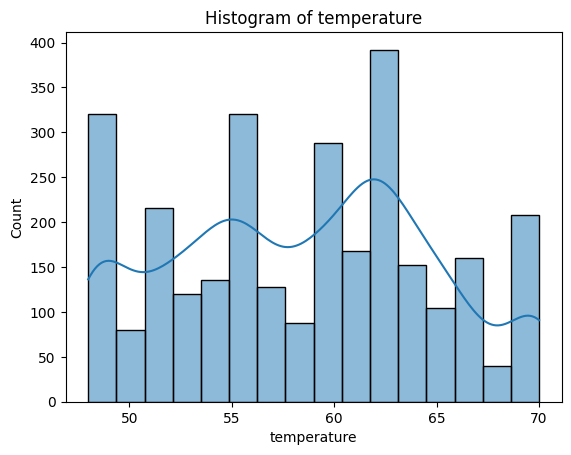

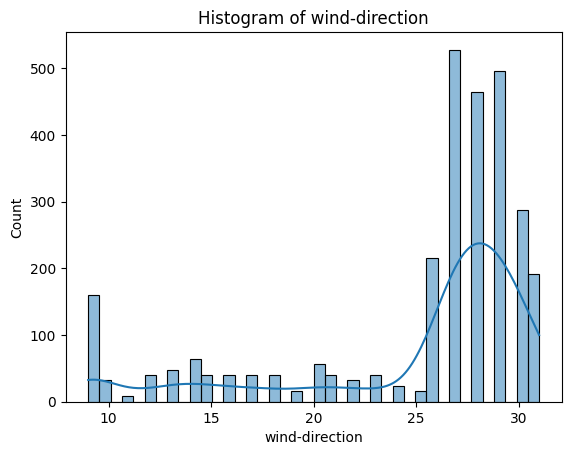

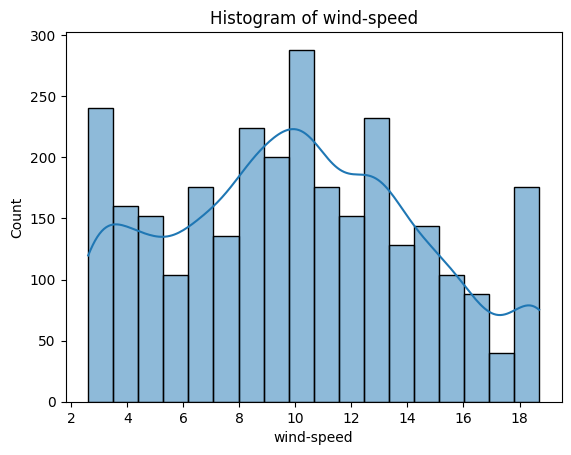

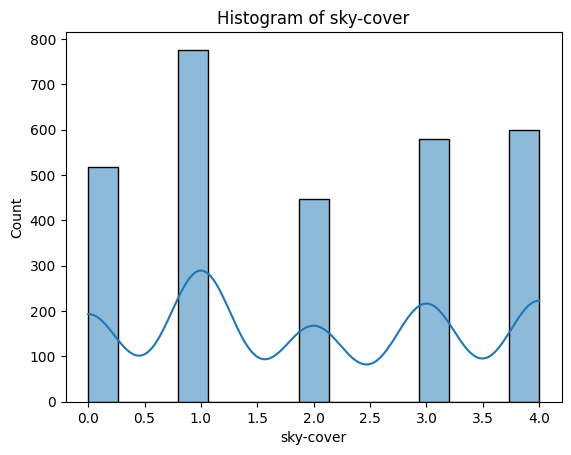

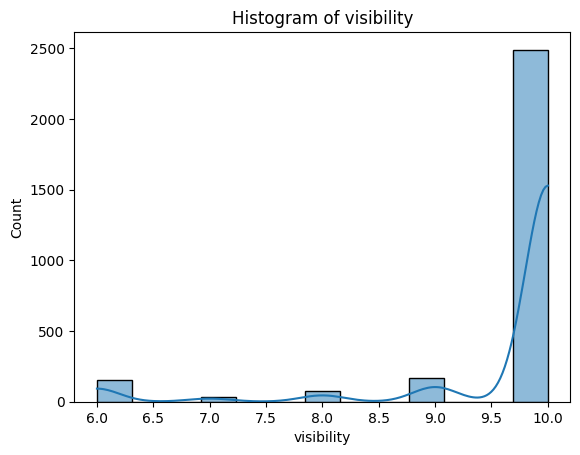

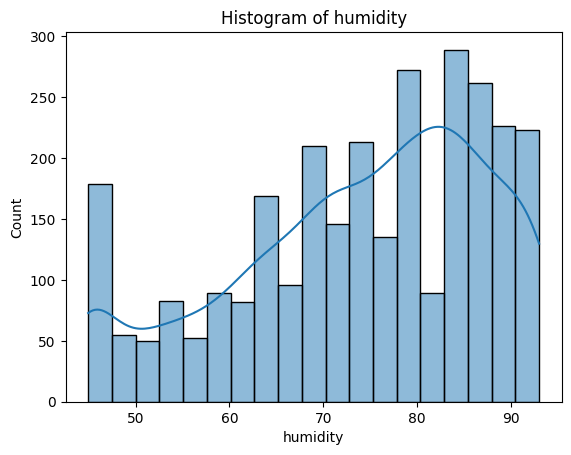

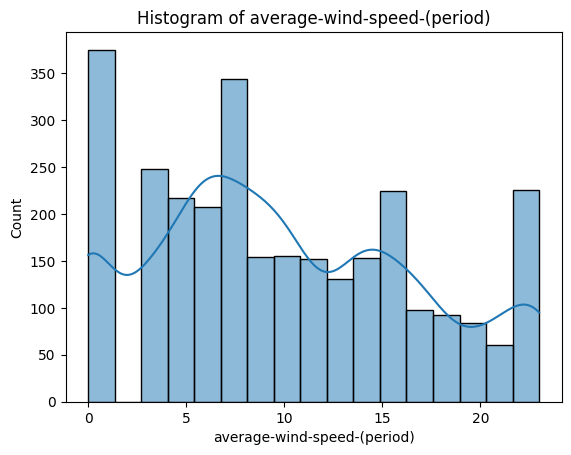

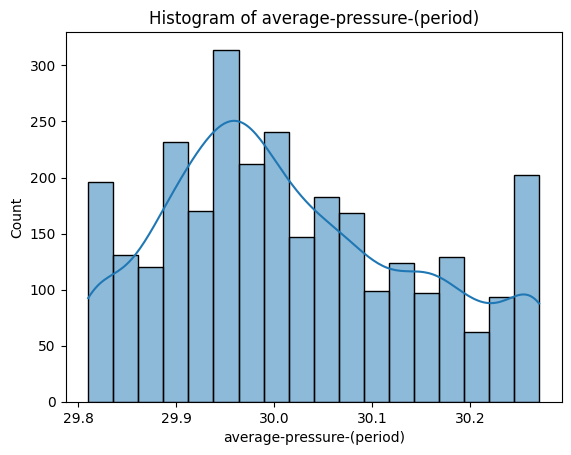

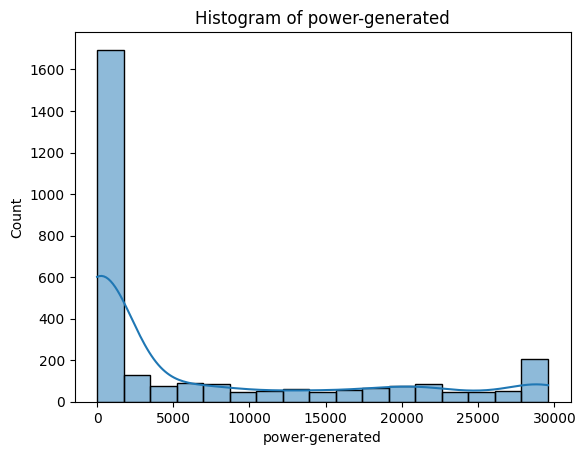

In [15]:
#Histogram
for col in numerical_columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

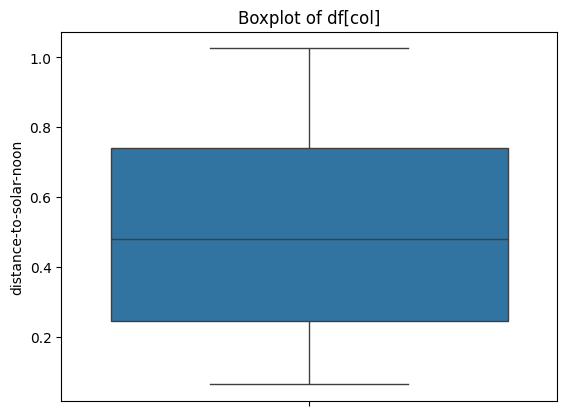

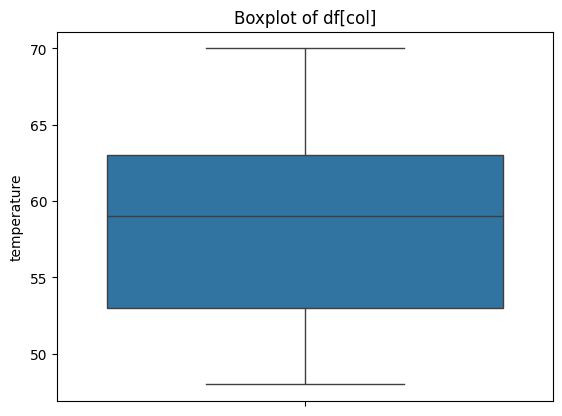

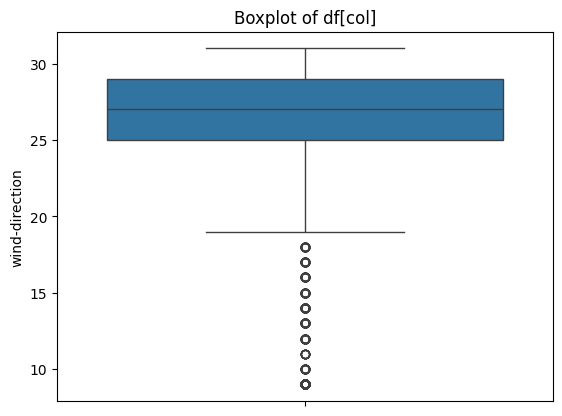

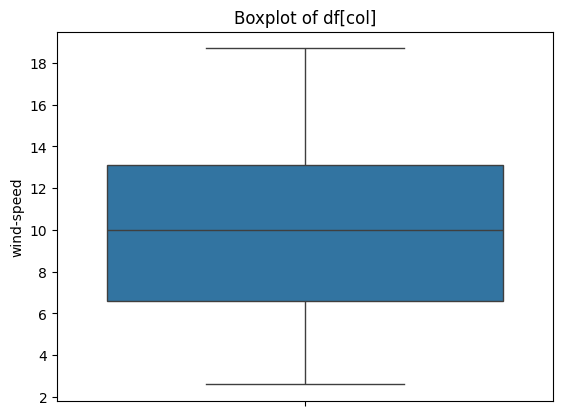

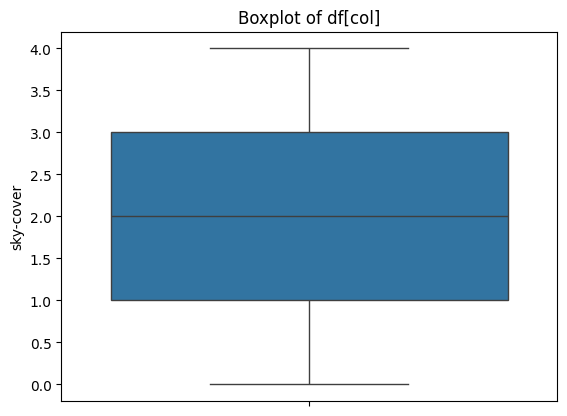

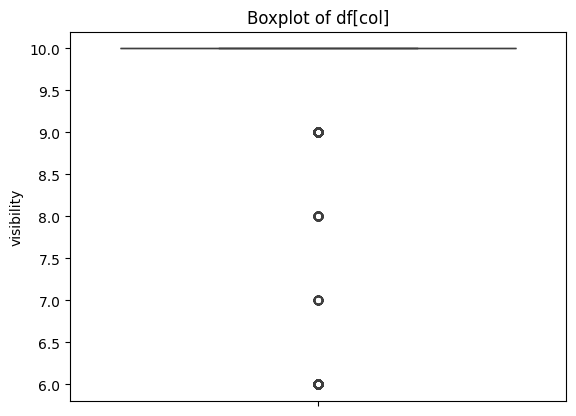

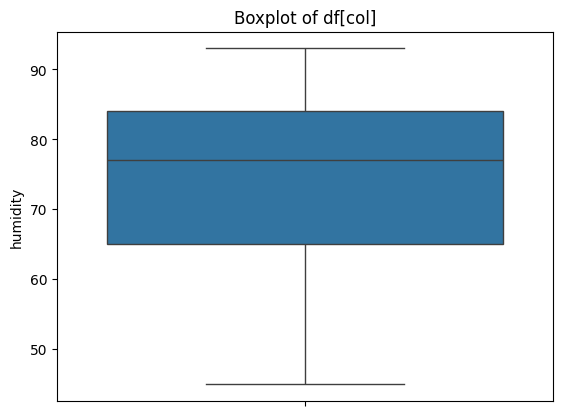

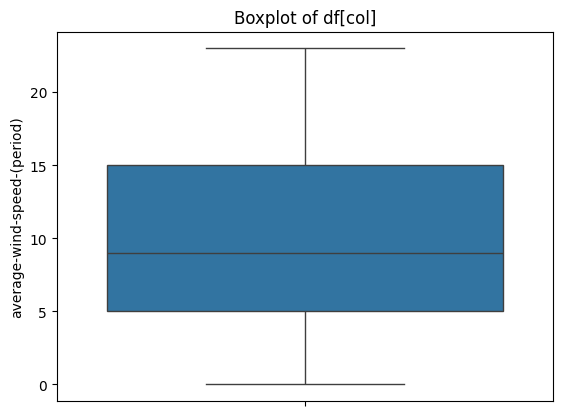

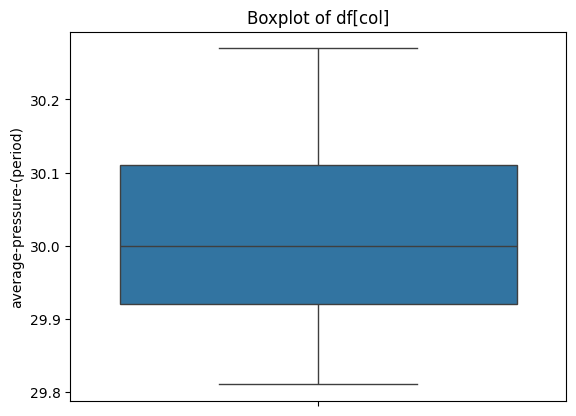

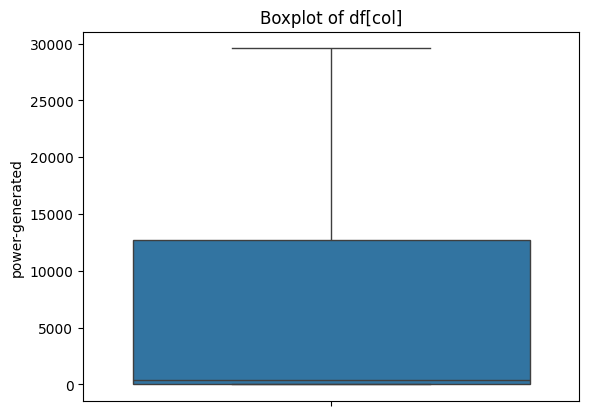

In [16]:
#Boxplot
for col in numerical_columns:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of df[col]")
    plt.show()

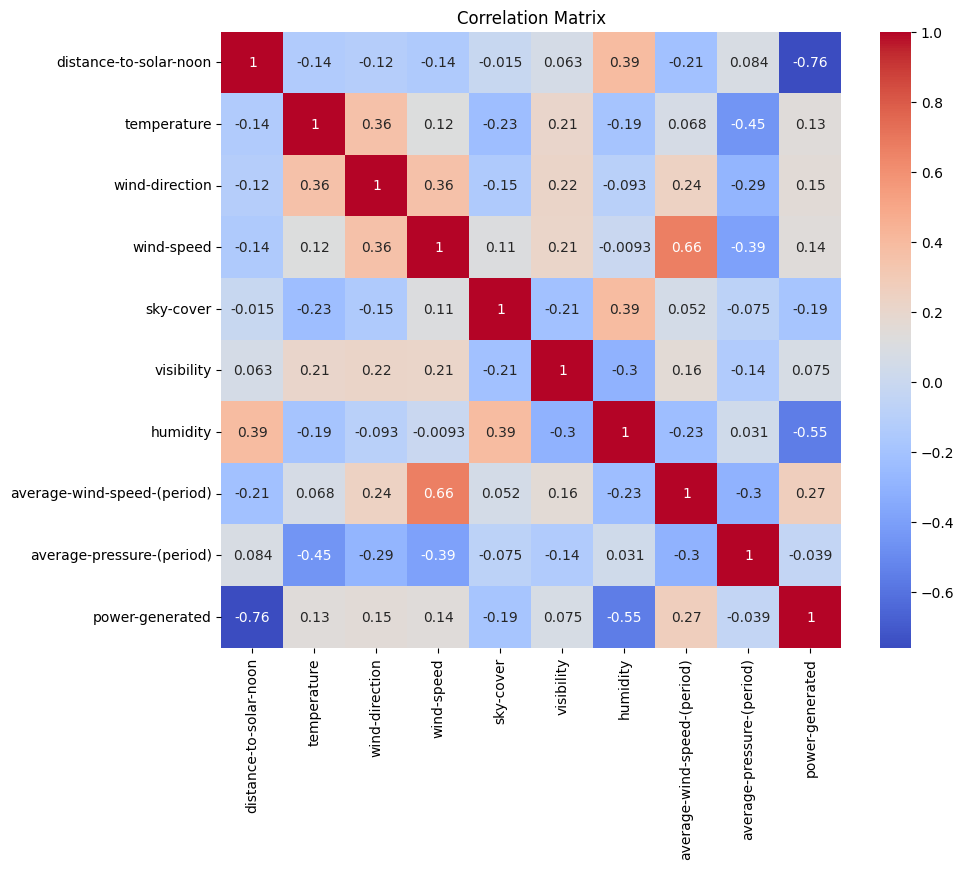

In [17]:
#Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

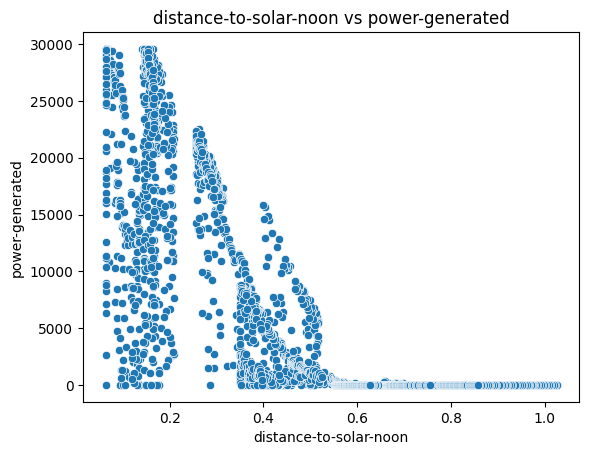

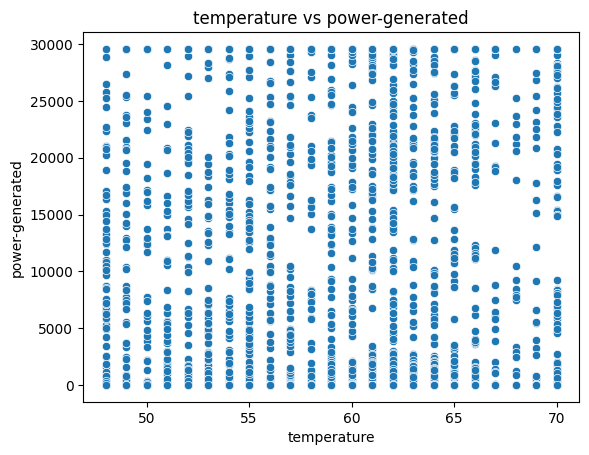

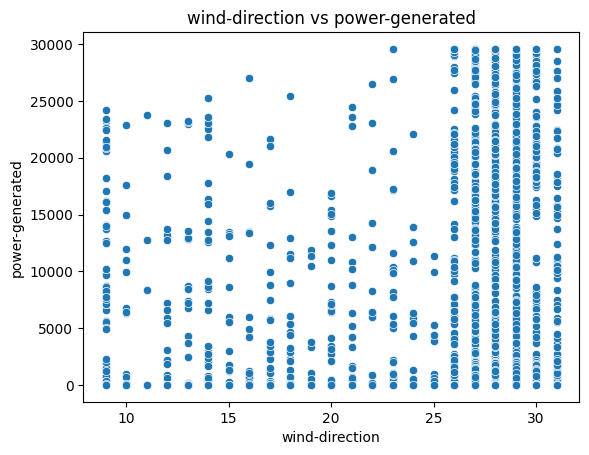

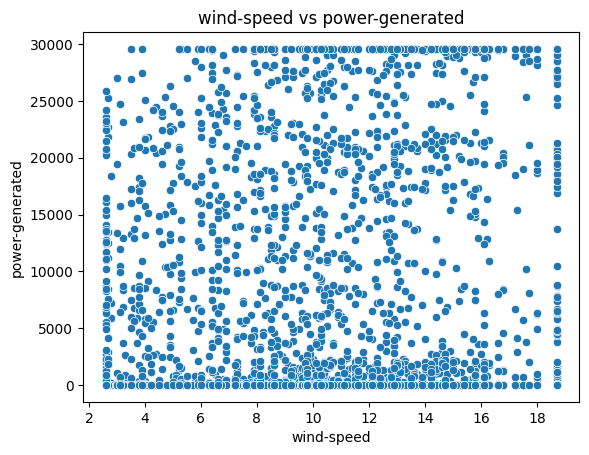

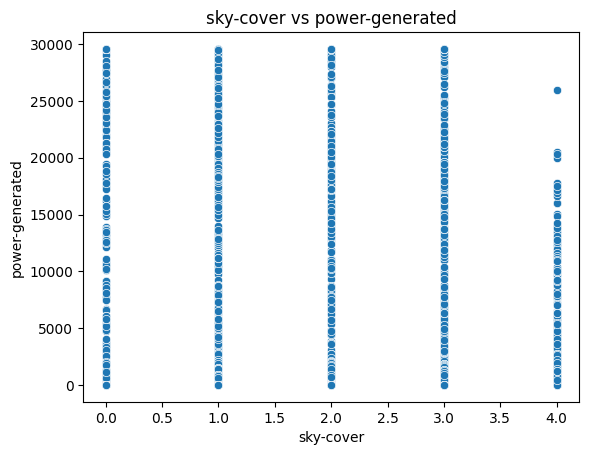

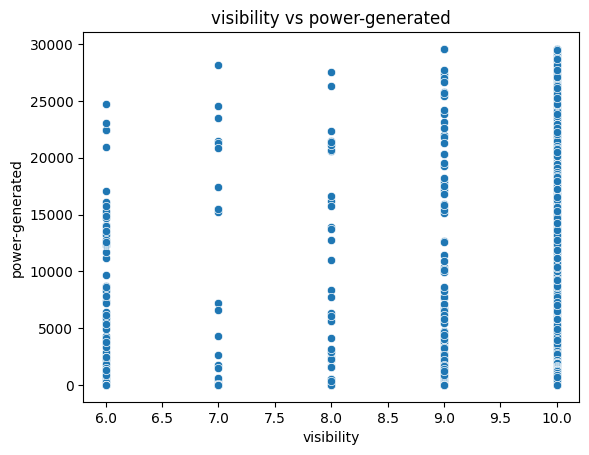

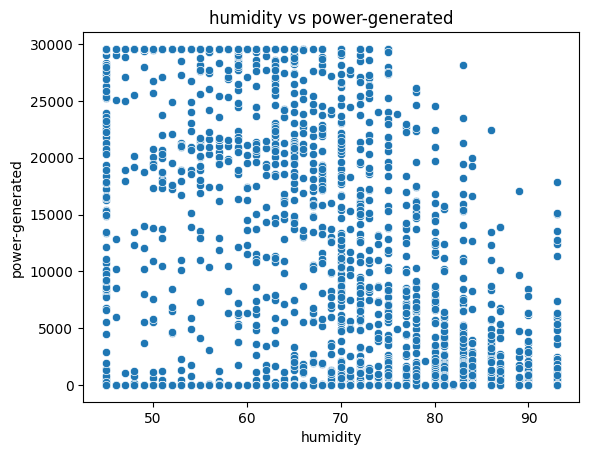

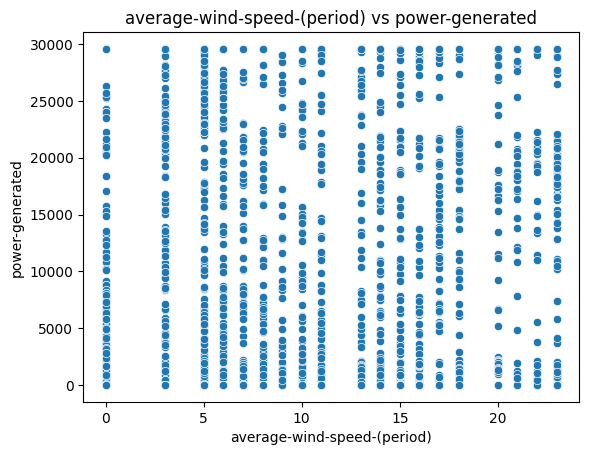

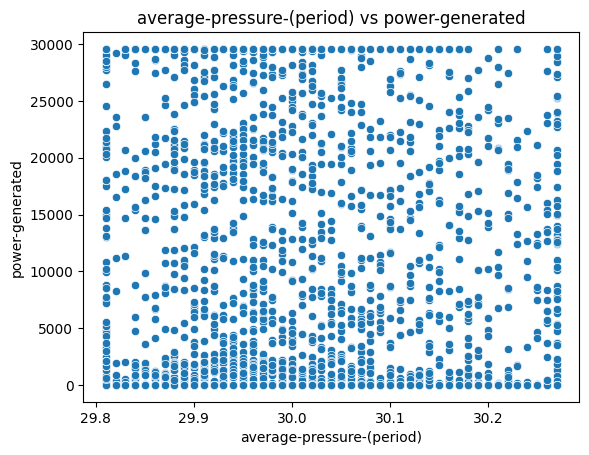

In [18]:
#Feature-target scatter plot
target= 'power-generated'
features= [col for col in df.columns if col !=target]
for feature in features:
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f"{feature} vs {target}")
    plt.show()

<Axes: >

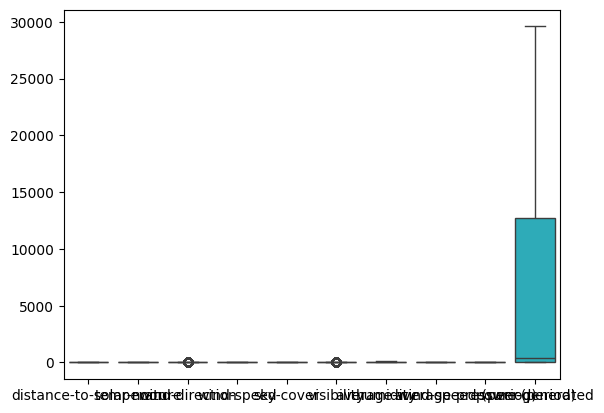

In [19]:
sns.boxplot(df)

<Axes: ylabel='Count'>

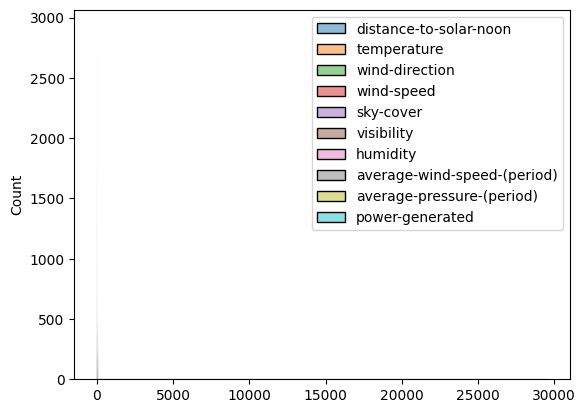

In [20]:
sns.histplot(df)

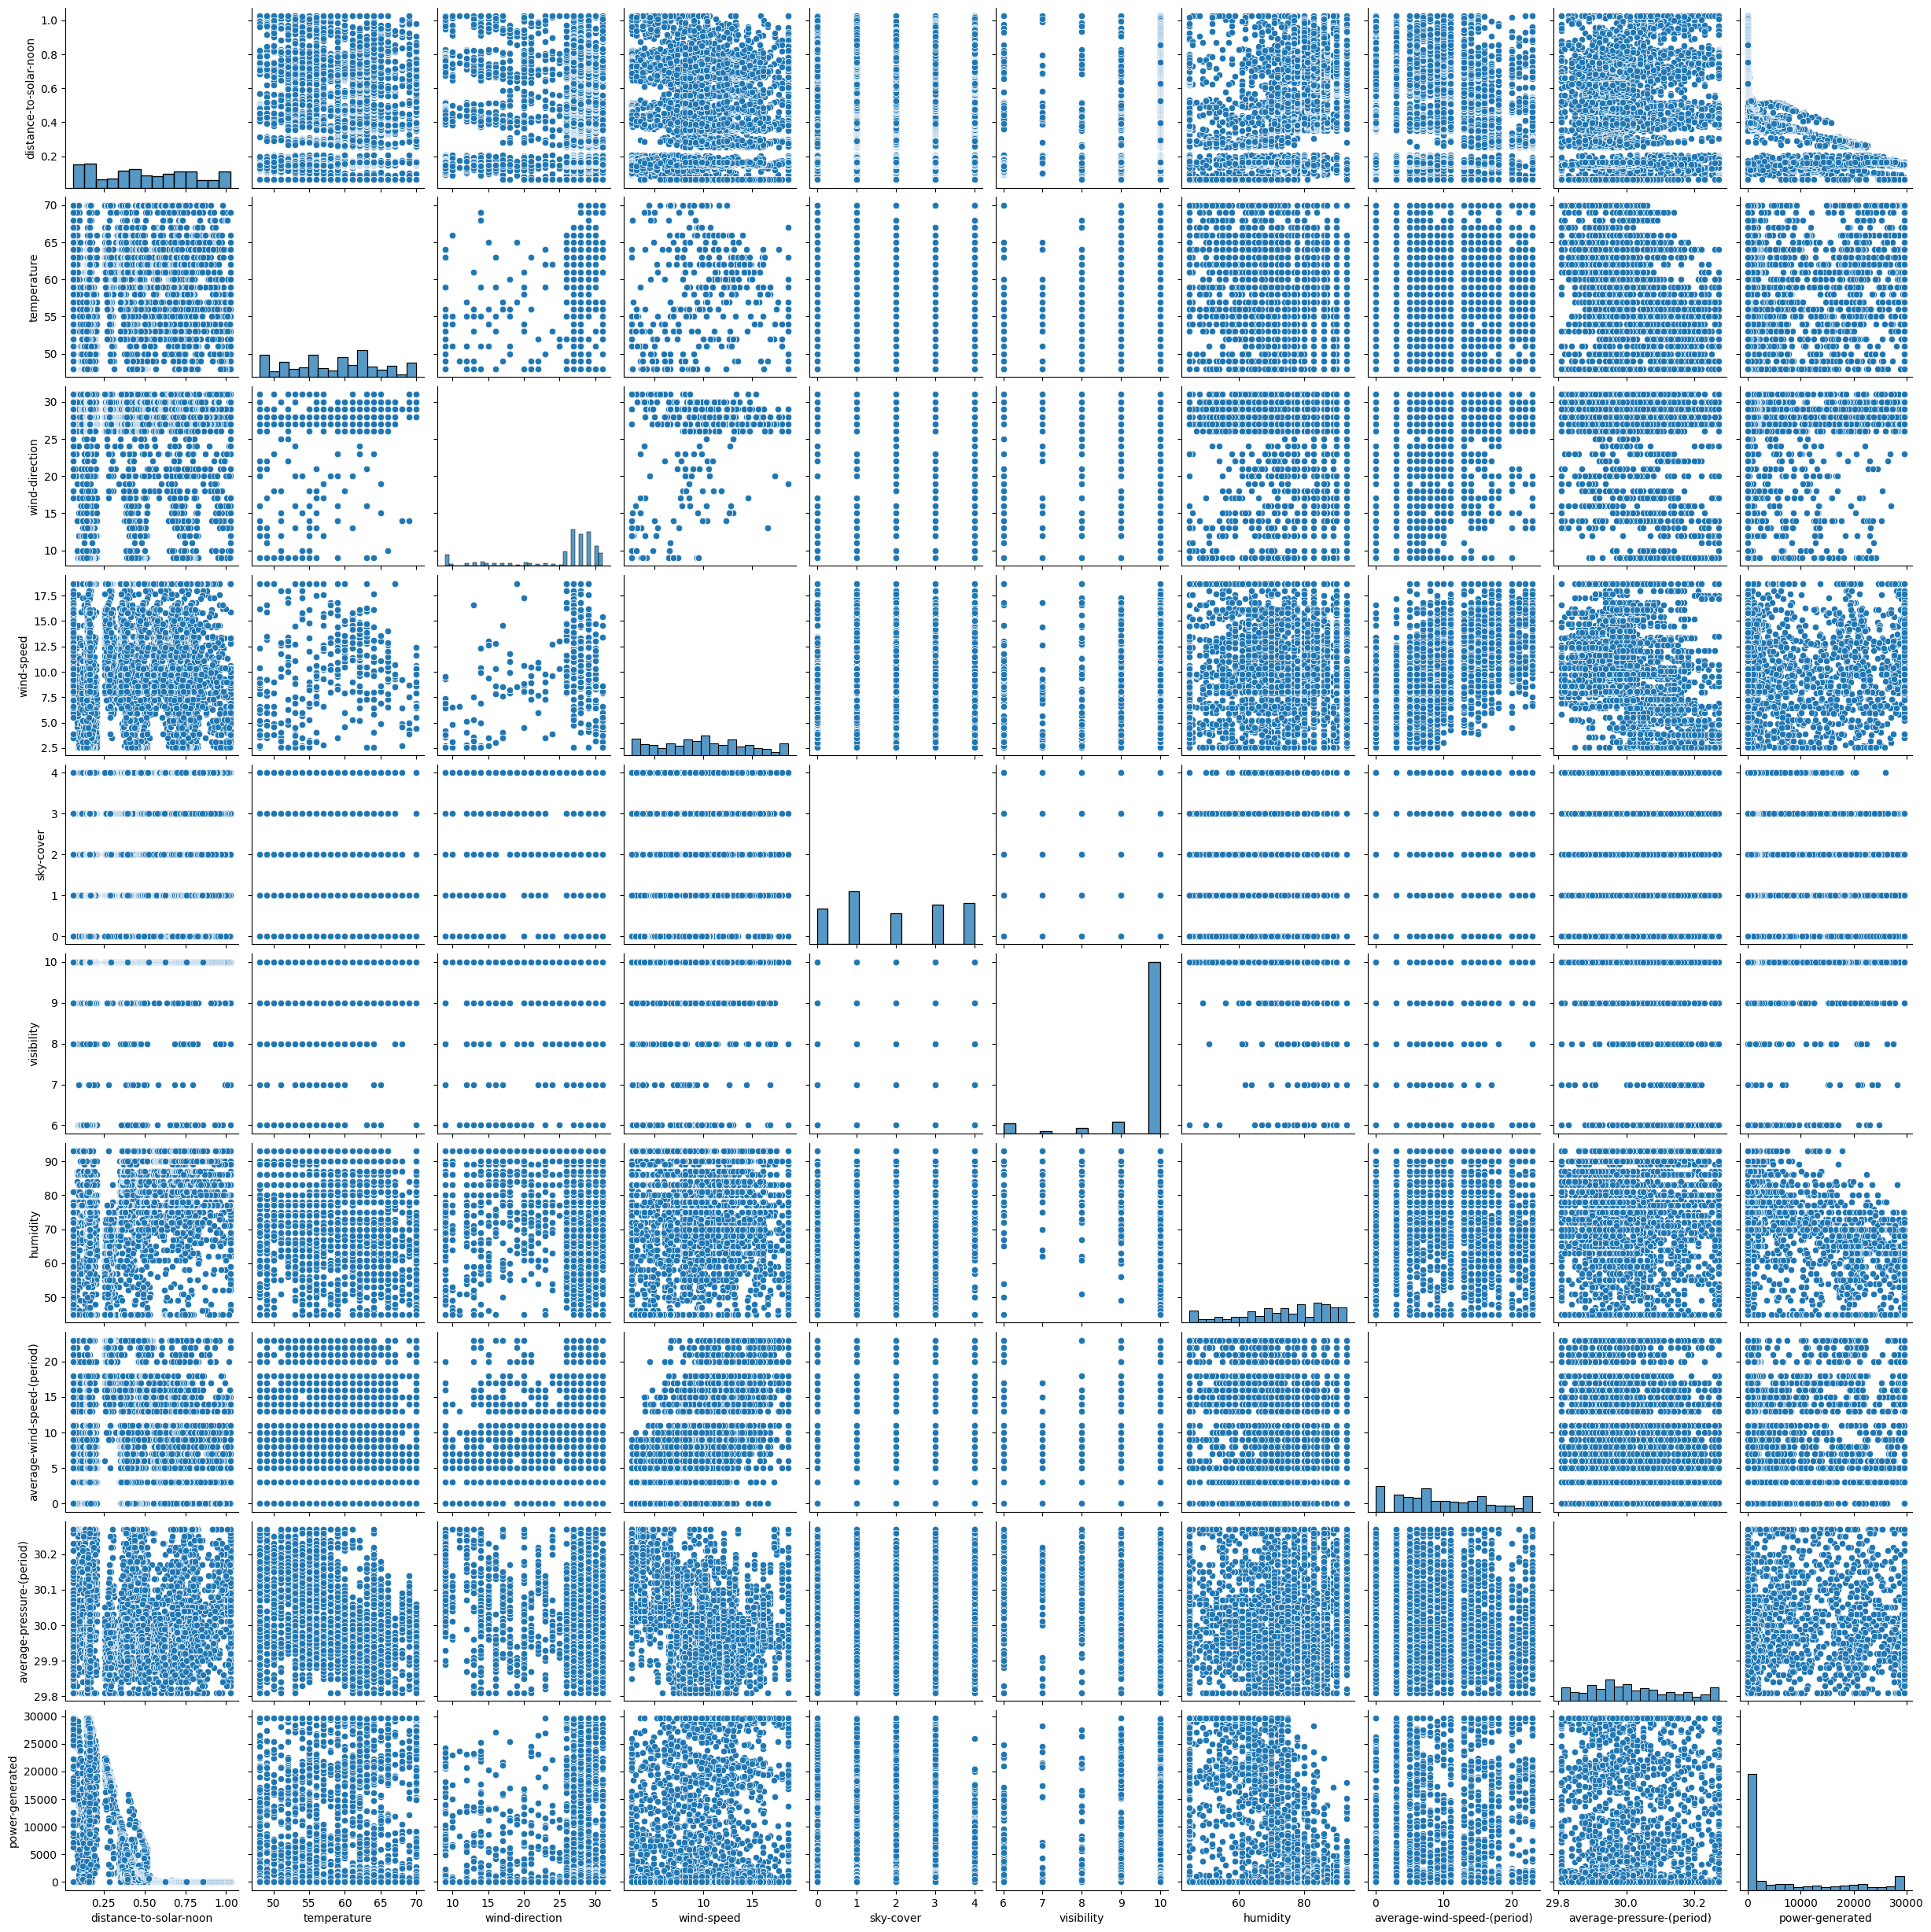

In [21]:
sns.pairplot(df)

In [31]:
q1_power_generated = df['power-generated'].quantile(0.25)
q3_power_generated = df['power-generated'].quantile(0.75)
iqr_power_generated = q3_power_generated - q1_power_generated

In [33]:
upper_limit_power_generated = q3_power_generated + (1.5 * iqr_power_generated)
lower_limit_power_generated = q1_power_generated - (1.5 * iqr_power_generated)
print('upper limit_power-generated', upper_limit_power_generated)
print('lower limit_power-generated', lower_limit_power_generated)

upper limit_power-generated 31808.75
lower limit_power-generated -19085.25


In [36]:
df= df.loc[(df['power-generated']<upper_limit_power_generated)&(df['power-generated']>lower_limit_power_generated)]

<Axes: ylabel='power-generated'>

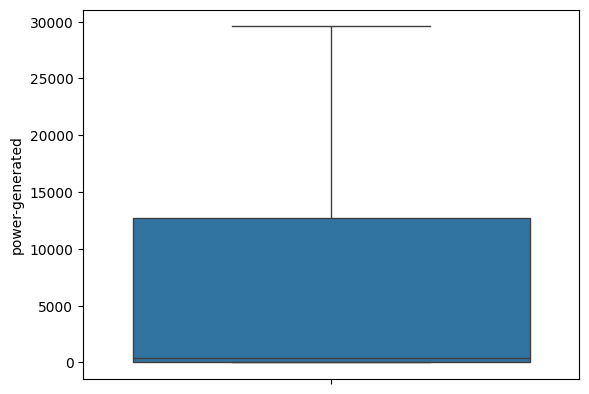

In [37]:
sns.boxplot(df['power-generated'])

In [38]:
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0     75.00                          8.0   
1             0        10.0     77.00                          5.0   
2             0        10.0     70.00                          0.0   
3             0        10.0     44.95                          0.0   
4             0        10.0     44.95                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0     75.00                         10.0   
2916          1        10.0     66.00                         15.0   
2917          2        10.0     68.00                         21.0   
2918          2        10.0     81.00                         17.0   
2919          1        10.0     81.00                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82             0.00  
1                         29.85             0.00  
2                         29.89          5418.00  
3                         29.91         25477.00  
4                         29.89         29583.25  
...                         ...              ...  
2915                      29.93          6995.00  
2916                      29.91         29490.00  
2917                      29.88         17257.00  
2918                      29.87           677.00  
2919                      29.90             0.00  

[2920 rows x 10 columns]

Model building

In [39]:
target=df[['power-generated']]
features=df.drop('power-generated',axis=1)

In [40]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2190, 9)
(730, 9)
(2190, 1)
(730, 1)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
log_model= LogisticRegression()

In [44]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Instead of LogisticRegression, use a regression algorithm suited for continuous targets:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_model = LinearRegression()

# Fit the model
lin_model.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred=lin_model.predict(x_test)

In [49]:
r2_score(y_test,y_pred)

0.6415636931975135

In [51]:
lin_model.coef_

array([[-22792.55044292,    -50.31099481,     64.81620491,
            27.86311839,   -767.69364026,    174.51387946,
          -170.53190497,    105.37859205,   3329.93155193]])

In [52]:
lin_model.intercept_

array([-69196.63648056])

In [53]:
sse=((y_test-y_pred)**2).sum()
sse

power-generated    2.284986e+10
dtype: float64

In [54]:
sst=((y_test-y_test.mean())**2).sum()
sst

power-generated    6.374874e+10
dtype: float64

In [55]:
R_squared=1-(sse/sst)
R_squared

power-generated    0.641564
dtype: float64

In [56]:
lin_model_mult= LinearRegression()

In [57]:
## Train the Model
lin_model_mult.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred=lin_model_mult.predict(x_test)

In [59]:
R_squred=r2_score(y_test,y_pred)
R_squred

0.6415636931975135

In [60]:
lin_model_mult.coef_

array([[-22792.55044292,    -50.31099481,     64.81620491,
            27.86311839,   -767.69364026,    174.51387946,
          -170.53190497,    105.37859205,   3329.93155193]])

In [61]:
lin_model_mult.intercept_

array([-69196.63648056])

In [62]:
x_train, x_test, y_train, y_test=train_test_split(target,features,test_size=0.2,random_state=42)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2336, 1)
(584, 1)
(2336, 9)
(584, 9)


In [64]:
scaler = StandardScaler()

In [65]:
x_train_scaled = scaler.fit_transform(x_train)

In [66]:
x_test_scaled = scaler.transform(x_test)

In [67]:
# model:1 using all features
model1=LinearRegression()

In [68]:
model1.fit(x_train_scaled,y_train)

LinearRegression()

In [69]:
y_pred1= model1.predict(x_test_scaled)

In [70]:
mse1 = mean_squared_error(y_test, y_pred1)

In [71]:
r2_1 = r2_score(y_test, y_pred1)

In [72]:
print("Model 1: Using all features")
print(f"Mean Squared Error: {mse1:.2f}")
print(f"R-squared: {r2_1:.2f}")

Model 1: Using all features
Mean Squared Error: 31.55
R-squared: 0.10


In [73]:
coefficients1=model1.coef_
print("Model 1 Coefficients:", coefficients1)

Model 1 Coefficients: [[-2.22880431e-01]
 [ 8.50175812e-01]
 [ 9.80804986e-01]
 [ 6.09109548e-01]
 [-2.76498947e-01]
 [ 9.11542809e-02]
 [-7.54621460e+00]
 [ 1.82586800e+00]
 [-5.08826712e-03]]
